# Transformers

- **Transformer Encoder**: Converts a sequence of words to a vector representation which can be used for text-understanding tasks. It is trained using fill-in-the-blanks tasks - MLM (Masked Language Modelling).

- **Transformer Decoder**: Uses the context of the sequence of words so far (sometimes with an additional context from encoder or retrieval) to predict next token in the sequence. It is trained using next-token-prediction tasks.

A generative autoregressive model takes the predicted word and all the words before to use it to predict the next word. All the LLMs which we use are autoregressive decoder only transformer models that predict one token at a time.

Text Vectorization and Embedding Layers are used in Encoder-Decoder Transformer.

<br>

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5%20AST%205%20Big%20Picture.png" width=800px/>
</center>

Above is the entire architecture of transformer. A TextVectorization layer, Embedding layer, an Encoder and a Decoder.

Transformer architecture follows an encoder-decoder structure. The encoder, on the left-hand side, is tasked with mapping an input sequence to a sequence of continuous representations; the decoder, on the right-hand side, receives the output of the encoder together with the decoder output at the previous time step to generate an output sequence. The Transformer architecture was originally designed for translation. In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.

TextVectorization and Embedding Layers are also required in Encoder-only Transformer.

<br>

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5_AST_05_Image1_Transformer.png" width=900px/>
</center>

- The decoder architecture is very similar to the encoder architecture expect that instead of multi-head attention, masked multi-head attention is used.
- A multi head attention is is called as a bidirectional encoder. Every word gets modified by every other word in that sequence.

## Transformer Encoder Architecture

1. Initial input: Sequence of word vectors, often with a special CLS token prepended
2. Positional encoding: Added to give the model information about token positions
3. Multi-head attention layer: Each vector is modified based on all other vectors
4. Feed-forward neural network: Applied to each position separately and identically
5. Layer normalization and residual connections: Applied after each sub-layer
6. Output: Sequence of encoded vectors
7. Goal: Obtain a rich representation of the input sequence

### CLS Token (in BERT-like models)

The CLS (Classification) token is a special token added to the input sequence, typically at the beginning. Its purpose is to aggregate information from the entire sequence into a single vector representation. In models like BERT, the final encoded vector corresponding to the [CLS] token is often used as the representation of the entire input for classification tasks. A classification layer can be added on top of this encoded [CLS] vector for specific downstream tasks.

This architecture forms the basis of the Transformer encoder, which is a key component in many modern NLP models. The exact usage of the CLS token and the way the final representation is obtained can vary between different model implementations.

## Transformer Decoder Architecture

1. Initial input: Sequence of output tokens (shifted right)
2. Positional encoding: Added to give the model information about token positions
3. Masked multi-head self-attention: Each token attends only to previous tokens
4. Multi-head attention: Attends to the encoder's output
5. Feed-forward neural network: Applied to each position separately and identically
6. Layer normalization and residual connections: Applied after each sub-layer
7. Output: Probability distribution over vocabulary for the next token. The classification layer is placed on top of the last encoded vector.

### Masked Self-Attention

The masked self-attention mechanism ensures that predictions for a given position can only depend on known outputs at earlier positions. This is crucial for maintaining the auto-regressive property during training and inference.

### Cross-Attention

The decoder uses an additional multi-head attention layer that allows it to attend to the encoder's output. This enables the decoder to incorporate information from the input sequence when generating each output token.

### Output Generation

The final layer of the decoder produces a probability distribution over the vocabulary for the next token. During inference, this distribution is typically used to select the most likely next token, which is then fed back into the decoder to generate the subsequent token.

This architecture forms the basis of the Transformer decoder, which is used in many sequence-to-sequence tasks such as machine translation, text summarization, and text generation. The decoder works in conjunction with the encoder to transform input sequences into output sequences.


## Attention

The meaning of the words depend on the context. For instance, station can mean railway station, police station or space station.

- I spent the night locked up in station -> Police station
- The train left the station -> Train station
- The satellite left the station -> Space station

So the foundational fact is that context determines the meaning. Hence, there is a need to adaptively change the word vector representation for every word in such a way that it reflects the contextual meaning. This is what is done by an attention mechanism. (When the input sequence which was CLS I love NLP, was passed through the multi head attention mechanism on the output side, the vector that was CLS has been modulated with every other word that is present there to come to a representation on which classification can be done.)

### Self-Attention

Self attention is what provides us the mechanism to modulate the representation of a token using the representation of tokens nearby.

<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 200">
  <rect x="10" y="10" width="380" height="30" fill="#f0f0f0" stroke="#000"/>
  <text x="20" y="30" font-family="Arial, sans-serif" font-size="12">Input: "The train left the station on time."</text>
  
  <rect x="10" y="50" width="380" height="30" fill="#e0e0e0" stroke="#000"/>
  <text x="20" y="70" font-family="Arial, sans-serif" font-size="12">Tokenize: ["The", "train", "left", "the", "station", "on", "time"]</text>
  
  <rect x="10" y="90" width="380" height="60" fill="#d0d0d0" stroke="#000"/>
  <text x="20" y="110" font-family="Arial, sans-serif" font-size="12">Embed:</text>
  <rect x="70" y="100" width="20" height="40" fill="#fff" stroke="#000"/>
  <rect x="100" y="100" width="20" height="40" fill="#fff" stroke="#000"/>
  <rect x="130" y="100" width="20" height="40" fill="#fff" stroke="#000"/>
  <rect x="160" y="100" width="20" height="40" fill="#fff" stroke="#000"/>
  <rect x="190" y="100" width="20" height="40" fill="#ff9999" stroke="#000"/>
  <rect x="220" y="100" width="20" height="40" fill="#fff" stroke="#000"/>
  <rect x="250" y="100" width="20" height="40" fill="#fff" stroke="#000"/>
</svg>

1. Step 1: The cosine distance between every word and station is calculated. The attention score matrix is calculated which represents the cosine distance between every word. Suppose the example scores (not normalized) are:

  - the: 0.2
  - train: 0.8
  - left: 0.6
  - the: 0.3
  - station: 1.0
  - on: 0.2
  - time: 0.2

2. The context aware vector for station is then given as $$\sum \text{relevancy score}(station, word) \times v_{\text{word}} \quad (v_{\text{word}} \text{ is the encoded vector for the word})$$ The word station is also included in this sum.

3. This processs is repeated to calculate context aware vector for every word in the sequence. (Technically token!) This produces a new sequence of vectors that encode the sentence. One of the problems is that there is nothing to learn here. How is it ensured that the word vectors are in such a way that the whole process becomes learnable? One way is to learn the word vector but that's very expensive.

$$\text{output} = \sum (\text{input} \times \text{pairwise score}(input, input))$$

This is generalized as **Query-key-value** model.

### Generalized Self Attention — Query-Key-Value Model

1. Query (Q): Represents the current word seeking context.
2. Key (K): Encoding of each word as a potential match for queries.
3. Value (V): Actual content of each word to be aggregated.
4. Attention Scores: Computed as dot product of Q and K, then scaled and softmax-normalized.
5. Output: Weighted sum of V, with weights from attention scores.

This mechanism allows each word to attend to all others, capturing complex relationships in the sequence. This Query-Key-Value approach provides a flexible and powerful framework for self-attention, enabling the model to focus on relevant parts of the input when processing each word.

$$Q \cdot V = \max Q \cdot K$$

So self-attention can be seen as a generalized query-key-value model.

$$\text{output} = \sum \text{values} \times \text{pairwise\_ score}(\text{query, key})$$

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/ny01htcdnxns1i24t5iny/pic1.png?rlkey=6smnzfgb2gc0d3jaiku8tczmu&dl=1" alt="Description of image" />
</div>

$$z_1 = (x_1 \cdot x_1) x_1 + (x_1 \cdot x_2) x_2$$
$$z_2 =  (x_1 \cdot x_2) x_1 + (x_2 \cdot x_2) x_2$$

Pass $x$ to get $Q$, $K$ and $V$ vectors. Essentially, we have to learn three dense layers then $W^Q, W^K$ and $W^V$.

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/9wr38du0lbz4mbfel4s3j/pic2.png?rlkey=ldgeqj3rggaqxbsnatqy8jdvc&dl=1" alt="Description of image" />
</div>

$x_1 \to q_1, v_1, k_1$ and $x_2 \to q_2, v_2, k_2$. The attention scores are now $q_1 \cdot k_1$, $q_1 \cdot k_2$, $q_2 \cdot k_1$ and $q_2 \cdot k_2$. The context aware vectors are then $$\sum (q \cdot k) v_i$$ Previously, $W^Q = W^K = W^V = I$.

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/nd7welq0yi8c6zc6tk5tn/pic3.png?rlkey=6cp6qdxfwi2ujmytupx6fxxqj&dl=1" alt="Description of image" />
</div>

Then these weights are divided by the square root of the embedding dimension and then normalized using softmax.

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/na0jkpkjukngwnoda0td7/pic4.png?rlkey=2geimu55ja7o1pxgyyk1f36lq&dl=1" alt="Description of image" />
</div>

Then these normalized values are multiplied to value vectors $v_i$ and added to get the **context aware vector**.

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/4sr9impv411ra2gimolq0/pic5.png?rlkey=fv61jgyh8s8nzbn40q9io6lbm&dl=1" alt="Description of image" />
</div>

In one-head $W^Q, W^K$ and $W^V$ are learnt. **In multiheaded version, in parallel, 8 different $W^Q, W^K$ and $W^V$ are learnt**, so that $8$ variances of context aware vectors are produced. Here $8$ (number of heads) is a hyperparameter. Later all these are **concatenated and passed through another dense layer to form the final context aware vector.**

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/o5m8z46oyw8przhmqyn3i/pic6.png?rlkey=6r24ydevwwlgxg5nx9hk6ezed&dl=1" alt="Description of image" />
</div>

The full complexity of the system is shown in the figure below:

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/gt1w6gngaho7to59w5v1p/pic7.png?rlkey=kwq7cstwxvm27wo03m2csbsi1&dl=1" alt="Description of image" />
</div>

A few more subtleities are:
- Another dense layer $R$ is used with skip connections.
- Positional embedding: $Q \cdot K$ is same for "thinking machines" as well as "machines thinking". To capture this information, we use positional encoding in a similar fashion as token embedding.

<div style="text-align: center;">
  <img src="https://jalammar.github.io/images/t/transformer_positional_encoding_vectors.png" alt="Transformer Positional Encoding Vectors" />
</div>

**This makes the matrix of attention scores not symmetric, since same words at different positions are different.** **There is no need for $Q \cdot K$ is symmetric at all as well.** This makes attention $O(n^2)$ operation.

The final full system is shown below:

<div style="text-align: center;">
  <img src="https://www.dropbox.com/scl/fi/ky8zszaamhz453ryz44f0/pic.png?rlkey=1fgbj6rllssnr69ikj1bq1wnd&dl=1" alt="Description of image" />
</div>

Layer normalization is very similar to the batch normalization in CV. In batch normalization axis, the batch axis is a axis on which layer normalization and normalization is performed. In layer normalization is the layer axis on which the normalization is performed.



> [Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)

### Import necessary packages

In [1]:
# Installing the Hugging Face transformers library, which provides pre-trained models
# and tools for various Natural Language Processing (NLP) tasks.
# Also installing datasets library to easily access and preprocess datasets.
!pip install transformers datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00


In [2]:
# Importing math module for mathematical operations like logarithms, exponents, etc.
import math

# Importing PyTorch, a popular deep learning framework.
# torch: Core library for handling tensors (multi-dimensional arrays)
# nn: Submodule for building neural networks
# F: Submodule for using common neural network functions (e.g., ReLU, softmax)
import torch
import torch.nn as nn
import torch.nn.functional as F

# Importing dataset utilities from PyTorch, useful for creating custom datasets.
from torch.utils.data import dataset

# Importing NumPy for handling arrays and numerical operations
import numpy as np

# Importing matplotlib for data visualization, useful for plotting graphs and visualizing data
import matplotlib.pyplot as plt

# Importing Hugging Face's tokenizer to preprocess text for NLP models.
# AutoTokenizer automatically loads the appropriate tokenizer for a given pre-trained model.
from transformers import AutoTokenizer, DataCollatorWithPadding

# Importing Hugging Face's datasets library for easy access to a wide variety of pre-built datasets.
from datasets import load_dataset

# Importing DataLoader from PyTorch, which helps load datasets in mini-batches during training.
from torch.utils.data import DataLoader

# Importing datetime to work with dates and times (e.g., timestamping)
from datetime import datetime

# Importing pprint for pretty printing Python objects, making them easier to read
from pprint import pprint

# Re-importing NumPy and Matplotlib (duplicate imports)
import numpy as np
import matplotlib.pyplot as plt

# Importing scikit-learn's PCA (Principal Component Analysis) for dimensionality reduction.
# PCA is used to reduce the number of features/dimensions in the dataset, often for visualization or improving model performance.
from sklearn.decomposition import PCA

# Importing StandardScaler from scikit-learn to normalize/standardize the dataset.
# This is commonly used to ensure features have a mean of 0 and standard deviation of 1, improving training performance.
from sklearn.preprocessing import StandardScaler

# Importing pandas, a popular library for handling structured data (e.g., CSV files, DataFrames)
import pandas as pd

# Importing WordCloud to visualize the most common words in text data.
# This is especially useful for analyzing textual data by showing word frequency in a graphical format.
from wordcloud import WordCloud

#### Understanding Self Attention

<center>
<img src= https://www.dropbox.com/scl/fi/0fi9619uk3eizxe0saxub/Self_Attention_Scores.png?rlkey=q7kji50ctfbv4igfnuyas54vj&raw=1 width=900px/>
</center>

**outputs = sum(inputs * pairwise_scores(inputs, inputs))**


According to the self attention scores which are depicted in the picture, the word 'train pays' more attention to station rather than other words in consideration such as 'on' or 'the'.The self-attention model allows inputs to interact with each other (i.e calculate attention of all other inputs wrt one input).


#### Implementation details

Inside each attention head is a **Scaled Dot Product Self-Attention** operation, the operation returns a Attention vector as given by equation below:

$$ Self Attention = softmax(\frac{x^{T}_i x_j}{\sqrt{d_k}})x_j $$

The term  **$x^{T}_i x_j$** is dot product of input vector with itself. The  'pivot_vector' and the 'vector' forms the 'xi' and 'xj' of the above Self Attention function.

#### **Attention Eqn. with Queries, Keys and Values**

We computed the Self Attention based on the inputs of vectors themselves. This means that for fixed inputs, these attention weights would always be fixed. In other words, there are no learnable parameters. Need to introduce some learnable parmeters which will make the self attention mechanism more flexible and tunable for various tasks. To fullfil this purpose, three weight matices are introduced and multiplied with input $x_i$ seperately and three new terms **Queries(Q), Keys(K) and Values(V)** comes into picture as given by equations below. Vectorized implemenation  & Shape tracking are also shown along with equations.

**Vectorized implemenation  & Shape tracking**

$ d_{model} $ = Embedding vector for each word ( 512 as per the paper).

$ X   \Rightarrow (T \times d_{model}) $


$ Q = X W^{Q}   \Rightarrow (T \times d_{model}) \times (d_{model} \times d_k  )  \Rightarrow   (T \times d_k ) $


$ K = X W^{K}   \Rightarrow (T \times d_{model}) \times (d_{model} \times d_k  )  \Rightarrow   (T \times d_k ) $


$ V = X W^{V}   \Rightarrow (T \times d_{model}) \times (d_{model} \times d_v  )  \Rightarrow   (T \times d_v) $

Dot product of Queries and Keys:

$ Q K^{T}   \Rightarrow (T \times d_{k}) \times (d_{k} \times T  )  \Rightarrow   (T \times T) $

T query vectors and T key vectors (Input Sequence), so need TxT attention weights. Make Sense! Taking SoftMax doesn't change the shape.

 **Shapes as per the paper**

$
\begin{array}{|c|c|} \hline
Object   &  Shape & values  \\ \hline
q_i, k_i  &  d_k  &  (64,) \\
v_i   &   d_v   &   (64,)  \\
x_i   &   d_{model}   & (512,)  \\
W^{Q}, W^{K}  &   d_{model} \times d_k   &   (512, 64)  \\
W^{V}   &   d_{model} \times d_v   &  (512,64)  \\ \hline
\end{array}
$

**Batch consideration**

In code, a batch of N samples are processed at a time. Everyting would be  **N times**, like: $ N \times T \times d_k $ instead of just $ T \times d_k$.

**Final Scaled Dot Product Attention** equation inside each attention head with **Queries(Q)**, **Keys(Q)**, and **Values(V)**, which returns a Attention vector.

<center>
<img src= https://www.dropbox.com/scl/fi/pfr6b522rccvp7bkuqilg/Scaled_dot_product_Attention.png?rlkey=nyba4vhest5995hdain8igayq&raw=1 width=250px/>

</center>


$$Attention(Q, K, V) = softmax\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$



$ Shape \ of \ attention \ output = (T \times T) \times (T \times d_v)   \Rightarrow  (T \times d_v)$

#### Implementation with dummy data

In [3]:
T, d_k, d_v = 4, 6, 6   # T= Number of terms
q = np.random.randn(T, d_k) # 4X6
k = np.random.randn(T, d_k) # 4X6
v = np.random.randn(T, d_v) # 4X6

In [4]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[ 0.09412259  1.1641052  -0.18039858  1.67354778 -0.03168745  0.86009576]
 [-0.16964185  1.32994608  0.41069228 -2.00123283 -0.59916392  0.26636786]
 [-0.19644203 -0.13109167 -0.94554796 -1.54247443 -0.12390203  0.05202407]
 [-0.37670061  1.0727388   1.04809172 -1.35029308  0.36551427  0.77411777]]
K
 [[-0.23545728  0.34701742 -0.77208284 -0.32625215  0.22065903  0.75305596]
 [-0.58810432 -0.2321551  -0.11267009 -0.07251877  0.82651355 -1.17113802]
 [-1.61930169  0.0906975  -0.58119768  1.66987879 -1.16288071 -0.20494013]
 [-0.14693425  0.9273034  -0.82067807 -0.46663221  0.07533044  0.63112233]]
V
 [[-0.73348705  0.90134479  0.51643799 -1.99385061 -0.65571991 -0.68835856]
 [ 1.63547602  0.25508965  0.09203057  1.11524046  1.00150026 -0.11618597]
 [-1.07252935  1.02324144 -0.89028502  0.2329194  -0.32678211  0.54105019]
 [ 0.88406892 -1.2023624  -1.18379356 -2.04286113  0.53840961 -0.78640727]]


In [5]:
np.matmul(q, k.T) # Dot product

array([[ 0.61579513, -1.46012592,  2.71321833,  0.97320533],
       [ 0.9056549 , -0.91730307, -2.54301883,  1.9779587 ],
       [ 1.24587651,  0.20102126, -1.58656435,  1.42656101],
       [ 0.75588636, -0.65216578, -2.74038488,  1.33614628]])

In [6]:
# Why we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q, k.T).var()

(0.814351799715063, 0.5385999311646746, 2.436277136584299)

In [7]:
scaled_dot_product = np.matmul(q, k.T) / math.sqrt(d_k)
print(scaled_dot_product)
q.var(), k.var(), scaled_dot_product.var()
# Notice the reduction in variance of the product

[[ 0.25139731 -0.59609391  1.10766674  0.39730941]
 [ 0.36973206 -0.37448741 -1.03818309  0.80749826]
 [ 0.50862696  0.08206658 -0.64771218  0.58239109]
 [ 0.30858932 -0.26624557 -1.11875744  0.54547943]]


(0.814351799715063, 0.5385999311646746, 0.4060461894307167)

In [8]:
scaled_dot_product.shape

(4, 4)

In [9]:
#### Masking
# This is to ensure words don't get context from words generated in the future.
# Not required in the encoders, but required in the decoders

mask = np.tril(np.ones( (T, T) ))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [10]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [11]:
scaled_dot_product + mask

array([[ 0.25139731,        -inf,        -inf,        -inf],
       [ 0.36973206, -0.37448741,        -inf,        -inf],
       [ 0.50862696,  0.08206658, -0.64771218,        -inf],
       [ 0.30858932, -0.26624557, -1.11875744,  0.54547943]])

In [12]:
### Softmax

def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

softmax(scaled_dot_product + mask)

attention = np.matmul (softmax(scaled_dot_product + mask),v)
print(attention)
attention.shape

[[-7.33487054e-01  9.01344785e-01  5.16437994e-01 -1.99385061e+00
  -6.55719913e-01 -6.88358565e-01]
 [ 2.95136686e-02  6.93197541e-01  3.79743940e-01 -9.92467868e-01
  -1.21958876e-01 -5.04071983e-01]
 [-1.72085499e-03  7.06421066e-01  1.50654370e-01 -6.06180918e-01
  -5.32724798e-02 -3.01905714e-01]
 [ 3.42011241e-01 -7.60008742e-02 -3.73157590e-01 -1.27008903e+00
   1.66720745e-01 -5.27855903e-01]]


(4, 6)

### Implementing Transformer Encoder

#### 1. Designing Encoder

Defining Multi Head Attention:

**Multihead Attention**

In the Transformer, the Attention module repeats its computations multiple times in parallel. Each of these is called an Attention Head. The Attention module splits its Query, Key, and Value parameters N-ways and passes each split independently through a separate Head. All of these similar Attention calculations are then combined together to produce a final Attention score. This is called Multi-head attention and gives the Transformer greater power to encode multiple relationships and nuances for each word.

In the paper, the diagram for a scaled dot product attention does not use any weights at all. Instead, the weights are included only in the multi head attention block, shown in figure below:

<p align="center">
  <img src="https://www.dropbox.com/scl/fi/p2oz8k5fmjp0irp2w4n90/picture_1.png?rlkey=u7ynw3jei10og8rgqbpcvxkgh&st=q67uqyfo&raw=1" alt="Image" />
</p>

**Attention Calculation & Shape**
<center>
<img src= "https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/Multi_head_attention_shape_tracking.png" width=800px/>
</center>

**Final Projection :** $ Output = concat(A_1, A_2, ..., A_h)  W^{o} $

**Shape of :**  $ concat (A_1, A_2, ..., A_h) \Rightarrow  (T \times hd_v) $

**Shape of:**  $  W^{o} \Rightarrow (hd_v \times d_{model}) $

**Shape of final:**  $ Ouput = concat (A_1, A_2, ..., A_h) W^{o} \Rightarrow  (T \times hd_v) \times (hd_v \times d_{model})  \Rightarrow  (T \times d_{model}) \Leftarrow $ **Back to the initial input shape.**

Note : Batch size is not displayed here.

In [13]:
# Define the MultiHeadAttention class that inherits from nn.Module
class MultiHeadAttention(nn.Module):

  # Initialization function to set up layers and hyperparameters
  def __init__(self, d_k, d_model, n_heads):
    super().__init__()

    # d_k: Dimensionality of the key and query vectors for each head
    # d_model: Dimensionality of the input (e.g., token embedding size)
    # n_heads: Number of attention heads to use

    # Store the key dimension and number of heads
    self.d_k = d_k
    self.n_heads = n_heads

    # Define linear layers for projecting inputs into key, query, and value vectors
    # Each projection maps from d_model (input size) to d_k * n_heads
    self.key = nn.Linear(d_model, d_k * n_heads)
    self.query = nn.Linear(d_model, d_k * n_heads)
    self.value = nn.Linear(d_model, d_k * n_heads)

    # Final linear layer to combine the results from all heads
    self.fc = nn.Linear(d_k * n_heads, d_model)

  # Forward function that performs the multi-head attention operation
  def forward(self, q, k, v, mask=None):
    # q, k, v are the input queries, keys, and values, respectively
    # q: Query matrix (N x T x d_model), k: Key matrix (N x T x d_model), v: Value matrix (N x T x d_model)
    # mask: Optional attention mask to ignore certain positions

    # Apply linear projections to query, key, and value inputs
    q = self.query(q)  # N x T x (h * d_k) where h = number of heads
    k = self.key(k)    # N x T x (h * d_k)
    v = self.value(v)  # N x T x (h * d_k)

    # Get the batch size (N) and sequence length (T)
    N = q.shape[0]
    T = q.shape[1]

    # Reshape query, key, and value into multiple heads
    # Shape transformations: (N, T, h * d_k) --> (N, h, T, d_k)
    q = q.view(N, T, self.n_heads, self.d_k).transpose(1, 2)  # Change to (N, h, T, d_k)
    k = k.view(N, T, self.n_heads, self.d_k).transpose(1, 2)  # Change to (N, h, T, d_k)
    v = v.view(N, T, self.n_heads, self.d_k).transpose(1, 2)  # Change to (N, h, T, d_k)

    # Compute scaled dot-product attention
    # Attention scores: (N, h, T, d_k) @ (N, h, d_k, T) --> (N, h, T, T)
    attn_scores = q @ k.transpose(-2, -1) / math.sqrt(self.d_k)  # Scale by sqrt(d_k) for stability

    # Apply mask (if provided) to ignore certain positions (e.g., padding tokens)
    if mask is not None:
      attn_scores = attn_scores.masked_fill(mask[:, None, None, :] == 0, float('-inf'))

    # Compute softmax to get attention weights (N, h, T, T)
    attn_weights = F.softmax(attn_scores, dim=-1)

    # Apply attention weights to values
    # (N, h, T, T) @ (N, h, T, d_k) --> (N, h, T, d_k)
    A = attn_weights @ v

    # Reshape the attention output back to (N, T, h * d_k)
    A = A.transpose(1, 2)  # Change back to (N, T, h, d_k)
    A = A.contiguous().view(N, T, self.d_k * self.n_heads)  # Combine heads into a single dimension

    # Final projection: Apply the final linear layer to combine the heads' outputs into a single vector
    return self.fc(A)

#### 2. Designing Transformer Block

The Transformer Encoder consists of a stack of
 identical layers (Encoder Block) as shown in figure below, where each layer further consists of two main sub-layers:

* The first sub-layer comprises a multi-head attention mechanism that receives the queries, keys, and values as inputs.
* A second sub-layer comprises a fully-connected feed-forward network.

Following each of these two sub-layers is layer normalization, into which the sub-layer input (through a residual/skip connection) and output are fed.

Regularization is also introduced into the model by applying a dropout to the output of each sub-layer (before the layer normalization step), as well as to the positional encodings before these are fed into the encoder.



<br>
<center>
<img src="https://cdn.extras.talentsprint.com/aiml/Experiment_related_data//Images/Encoder_tfr_block_unfolded.png"  width=600 px />$⇒$
<img src="https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/Encoder_tfr_block.png" width=180 px/>

</center>

The transformer encoder architecture typically consists of multiple layers, each of which includes a self-attention mechanism and a feed-forward neural network. The self-attention mechanism allows the model to weigh the importance of different input sequence parts by calculating the embeddings' dot product. This mechanism is also known as multi-head attention.

The feed-forward network allows the model to extract higher-level features from the input. This network usually comprises two linear layers with a ReLU activation function in between. The feed-forward network allows the model to extract deeper meaning from the input data and more compactly and usefully represent the input.In the paper, an ANN with one hidden layer and a ReLu activation in the middle  with no activation function at output layer has been implemented.

The transformer encoder is a crucial part of the transformer encoder-decoder architecture, which is widely used for natural language processing tasks.

In [14]:
# Define the TransformerBlock class that inherits from nn.Module
class TransformerBlock(nn.Module):

  # Initialization method to define the layers and parameters
  def __init__(self, d_k, d_model, n_heads, dropout_prob=0.1):
    super().__init__()

    # d_k: Dimension of each attention head
    # d_model: Input/output dimensionality of the model (token embedding size)
    # n_heads: Number of attention heads in the multi-head attention mechanism
    # dropout_prob: Dropout probability to prevent overfitting

    # Define the first layer normalization (before multi-head attention)
    self.ln1 = nn.LayerNorm(d_model)

    # Define the second layer normalization (before feed-forward network)
    self.ln2 = nn.LayerNorm(d_model)

    # Instantiate MultiHeadAttention module (already defined)
    self.mha = MultiHeadAttention(d_k, d_model, n_heads)

    # Define the feed-forward network (also known as ANN)
    # Sequential module with two linear layers and a GELU activation function in between
    self.ann = nn.Sequential(
        nn.Linear(d_model, d_model * 4),  # First linear layer expands dimension to 4 times the input
        nn.GELU(),                        # GELU activation function (Gaussian Error Linear Unit)
        nn.Linear(d_model * 4, d_model),  # Second linear layer projects back to the original dimension
        nn.Dropout(dropout_prob),         # Dropout for regularization (randomly drops units)
    )

    # Dropout layer applied to the final output of the transformer block
    self.dropout = nn.Dropout(p=dropout_prob)

  # Forward pass function that processes input through the transformer block
  def forward(self, x, mask=None):
    # x: Input tensor (N x T x d_model), where N is batch size and T is sequence length
    # mask: Optional attention mask to ignore certain positions (e.g., padding tokens)

    # Apply multi-head attention (MHA) followed by layer normalization with residual connection
    # x + self.mha(x, x, x): Residual connection adding the original input to the output of MHA
    # self.ln1 normalizes this combined output
    x = self.ln1(x + self.mha(x, x, x, mask))

    # Apply feed-forward network (ANN) followed by layer normalization with residual connection
    x = self.ln2(x + self.ann(x))

    # Apply dropout for regularization
    x = self.dropout(x)

    # Return the final output of the transformer block
    return x

#### Designing Positional Embedding

**Positional Embedding = Word Embedding + Positional Encoding**

**Positional Encoding**

Passing embeddings directly into the transformer block results in missing of information about the order of tokens. As attention is permutation invariant i.e. order of token does not matter to attention.
Although transformers are a sequence model, it appears that this important detail has somehow been lost. Positional encoding is for rescue.

Positional encoding add positional information to the existing embeddings.

**A unique set of numbers added at each position of the existing embeddings**, such that this new set of numbers can uniquely identify which postion they are located at. Following two ways are there to add positional encoding:


1. Positional Encoding by SubClassing the Embedding Layer (Trainable)
2. Positional Encoding scheme as per the paper (Non-Trainable)

 In this scheme the encoding is created by using a set of sins and cosines at different frequencies. The  paper uses the following formula for calculating the positional encoding. [Positional Encoding Vizualization.](https://erdem.pl/2021/05/understanding-positional-encoding-in-transformers)

$$\ {PE_{(pos, 2i)} = \sin(pos / 10000^{2i / d_{model}})} $$
$$\ {PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i / d_{model}})} $$

We are going to implement Positional Encoding as per the "Attention is all you need" paper.

#### 3. Creating Encoder Class

Stacking Attenttion blocks gives a Transfomer! Shown in figure below:

<br>
<center>
<img src= "https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/Encoder_transfomer.png" width=1000px/>
</center>

In [15]:
# Define the PositionalEncoding class that inherits from nn.Module
class PositionalEncoding(nn.Module):

  # Initialization method to set up parameters and precompute positional encodings
  def __init__(self, d_model, max_len=2048, dropout_porb=0.1):
    super().__init__()

    # d_model: Dimensionality of the input embeddings (e.g., word embeddings)
    # max_len: Maximum length of the input sequence for which positional encodings will be computed
    # dropout_porb: Dropout probability to prevent overfitting

    # Define a dropout layer to apply during training for regularization
    self.dropout = nn.Dropout(p=dropout_porb)

    # Create a tensor of shape (max_len, 1) where each element corresponds to the position index
    position = torch.arange(max_len).unsqueeze(1)  # Shape: (max_len, 1)

    # Create a tensor of even indices (0, 2, 4, ..., d_model-2)
    exp_term = torch.arange(0, d_model, 2)  # Shape: (d_model // 2)

    # Compute the term that will be used to scale positions (based on 10000^(2i/d_model))
    div_term = torch.exp(exp_term * (-math.log(10000.0) / d_model))  # Shape: (d_model // 2)

    # Initialize a tensor to store the positional encodings
    # Shape: (1, max_len, d_model) where max_len is the sequence length, and d_model is the embedding size
    pe = torch.zeros(1, max_len, d_model)

    # Apply sine to even indices (0, 2, 4, ...) and cosine to odd indices (1, 3, 5, ...)
    pe[0, :, 0::2] = torch.sin(position * div_term)  # Even indices use sine
    pe[0, :, 1::2] = torch.cos(position * div_term)  # Odd indices use cosine

    # Register the positional encoding (pe) as a buffer, meaning it won't be updated during training
    self.register_buffer('pe', pe)

  # Forward pass method to add positional encoding to the input embeddings
  def forward(self, x):
    # x: Input tensor of shape (N, T, D), where:
    # N = Batch size, T = Sequence length, D = Embedding dimension (d_model)

    # Add the positional encoding to the input (element-wise addition)
    # self.pe[:, :x.size(1), :] extracts the required number of positional encodings (T) from the precomputed 'pe' buffer
    x = x + self.pe[:, :x.size(1), :]

    # Apply dropout to the result (only during training)
    return self.dropout(x)

<p align="center">
  <img src="https://www.dropbox.com/scl/fi/30cu5nsjo30uzos7imgws/picture2.png?rlkey=dzjae00cexxj3pp38fe2vqzjh&st=dd7re9wj&raw=1" alt="Image" />
</p>

In [16]:
# Define the Encoder class that inherits from nn.Module
class Encoder(nn.Module):

  # Initialization method to define the layers and parameters
  def __init__(self, vocab_size, max_len, d_k, d_model, n_heads, n_layers, n_classes, dropout_prob):
    super().__init__()

    # vocab_size: Size of the vocabulary (number of unique tokens)
    # max_len: Maximum length of input sequences
    # d_k: Dimension of each attention head
    # d_model: Dimensionality of the input embeddings (also the model's hidden size)
    # n_heads: Number of attention heads in each transformer block
    # n_layers: Number of transformer blocks in the encoder
    # n_classes: Number of classes for the output (used for classification)
    # dropout_prob: Dropout probability for regularization

    # Embedding layer to map input token indices to dense vectors
    self.embedding = nn.Embedding(vocab_size, d_model)

    # Positional encoding to add positional information to the embeddings
    self.pos_encoding = PositionalEncoding(d_model, max_len, dropout_prob)

    # Stack of transformer blocks (a sequence of n_layers blocks)
    transformer_blocks = [TransformerBlock(d_k, d_model, n_heads, dropout_prob) for _ in range(n_layers)]
    self.transformer_blocks = nn.Sequential(*transformer_blocks)

    # Layer normalization applied to the output before classification
    self.ln = nn.LayerNorm(d_model)

    # Final linear layer for classification (maps the output of the [CLS] token to class logits)
    self.fc = nn.Linear(d_model, n_classes)

  # Forward pass method to process input through the encoder
  def forward(self, x, mask=None):
    # x: Input tensor of shape (N, T), where N is batch size, and T is sequence length
    # mask: Optional attention mask to ignore certain positions (e.g., padding tokens)

    # Step 1: Convert input token indices to embeddings
    x = self.embedding(x)  # Shape: (N, T, d_model)

    # Step 2: Add positional encodings to the embeddings
    x = self.pos_encoding(x)  # Shape: (N, T, d_model)

    # Step 3: Pass the input through each transformer block sequentially
    for block in self.transformer_blocks:
      x = block(x, mask)  # Shape: (N, T, d_model)

    # Step 4: Use the output of the first token (assumed to be the [CLS] token) for classification
    # cls_token_output will have the shape (N, d_model), as we only take the first token from each sequence
    cls_token_output = x[:, 0, :]  # Shape: (N, d_model)

    # Step 5: Apply layer normalization to the [CLS] token output
    cls_token_output = self.ln(cls_token_output)  # Shape: (N, d_model)

    # Step 6: Pass the [CLS] token output through the final linear layer to get class logits
    logits = self.fc(cls_token_output)  # Shape: (N, n_classes)

    # Return the [CLS] token output and the logits (used for classification)
    return cls_token_output, logits

#### Testing the forward pass with dummy values

In [17]:
vocab_size =20_000
max_length = 1024
d_k=16
d_model = 64
n_heads=4
nlayers =2
n_classes =5
dropout_prob=0.1
model = Encoder(vocab_size, max_length, d_k, d_model, n_heads, nlayers, n_classes, dropout_prob)

In [18]:
device = torch.device ("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Encoder(
  (embedding): Embedding(20000, 64)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_blocks): Sequential(
    (0): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mha): MultiHeadAttention(
        (key): Linear(in_features=64, out_features=64, bias=True)
        (query): Linear(in_features=64, out_features=64, bias=True)
        (value): Linear(in_features=64, out_features=64, bias=True)
        (fc): Linear(in_features=64, out_features=64, bias=True)
      )
      (ann): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, 

In [20]:
x = np.random.randint(0, vocab_size, size = (8,512))
x_t = torch.tensor(x).to(device)
mask = np.ones((8,512))
mask[:, 256:] = 0
mask_t = torch.tensor (mask).to (device)
cls_token_output,y = model(x_t, mask_t)
print(cls_token_output.shape)
print(y.shape)

torch.Size([8, 64])
torch.Size([8, 5])


#### Training the Encoder

We are going to use model built above (custom  encoder architecture) for sentiment classificaiton. Huggingface Library is used for demonstration using built in dataset **`glue - sst2`** and tokenizer.

##### Loading the Dataset

In [21]:
raw_datasets = load_dataset("glue", "sst2") # sst2 is DataSet for sentiment analysis as a part of glue bench-mark

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [22]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [23]:
raw_datasets['train'].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [24]:
raw_datasets['train']

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 67349
})

In [25]:
# common properties and functions available for interacting with the dataset
dir(raw_datasets['train'])

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_generate_tables_from_cache_file',
 '_generate_tables_from_shards',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',
 '_select_contiguous',
 '_select_wi

In [26]:
type(raw_datasets['train'])

datasets.arrow_dataset.Dataset

In [27]:
raw_datasets['train'].data

MemoryMappedTable
sentence: string
label: int64
idx: int32
----
sentence: [["hide new secretions from the parental units ","contains no wit , only labored gags ","that loves its characters and communicates something rather beautiful about human nature ","remains utterly satisfied to remain the same throughout ","on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ",...,"you wish you were at home watching that movie instead of in the theater watching this one ","'s no point in extracting the bare bones of byatt 's plot for purposes of bland hollywood romance ","underdeveloped ","the jokes are flat ","a heartening tale of small victories "],["suspense , intriguing characters and bizarre bank robberies , ","a gritty police thriller with all the dysfunctional family dynamics one could wish for ","with a wonderful ensemble cast of characters that bring the routine day to day struggles of the working class to life ","nonetheless appreciates the art and reveals a music sc

In [28]:
raw_datasets['train'][1]

{'sentence': 'contains no wit , only labored gags ', 'label': 0, 'idx': 1}

In [29]:
raw_datasets['train'][10:14]

{'sentence': ['goes to absurd lengths ',
  "for those moviegoers who complain that ` they do n't make movies like they used to anymore ",
  "the part where nothing 's happening , ",
  'saw how bad this movie was '],
 'label': [0, 0, 0, 0],
 'idx': [10, 11, 12, 13]}

In [30]:
raw_datasets['train'][0:3]['sentence']

['hide new secretions from the parental units ',
 'contains no wit , only labored gags ',
 'that loves its characters and communicates something rather beautiful about human nature ']

##### Data Preprocessing

In [31]:
# Define the pre-trained model checkpoint name
checkpoint = 'distilbert-base-cased'

# Initialize the tokenizer from the Hugging Face transformers library
# The tokenizer is specifically designed for the DistilBERT model
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
# Use the tokenizer to tokenize a given sentence
# The input is a raw sentence: 'hide new secretions from the parental units'
tokenized_sentences = tokenizer('hide new secretions from the parental units')

# Pretty-print the tokenized output for better readability
pprint(tokenized_sentences)

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [101, 4750, 1207, 3318, 5266, 1121, 1103, 22467, 2338, 102]}


In [33]:
# Define a function to tokenize a batch of sentences
def tokenize_fn(batch):
    # Apply the tokenizer to the 'sentence' field of the input batch
    # truncation=True ensures that any sentences longer than the model's max length are truncated
    return tokenizer(batch['sentence'], truncation=True)

In [34]:
# Apply the tokenize_fn function to the raw_datasets
# The map method processes the dataset in batches, tokenizing each batch of sentences
tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)

# Initialize a data collator that will handle padding for the tokenizer
# This collator will ensure that all sequences in a batch have the same length by adding padding tokens as necessary
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [35]:
data_collator

DataCollatorWithPadding(tokenizer=DistilBertTokenizerFast(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')

In [36]:
# Lets look at our tokenized data sets --> some new columns have been added.
# There are now two new columns called Input IDs and Attention Mask.
# Input IDs are the token indices and Attention Mask tells us which tokens are real tokens and which are padding.

tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 1821
    })
})

In [37]:
tokenized_datasets = tokenized_datasets.remove_columns(["sentence", "idx"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

In [38]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1821
    })
})

In [39]:
train_loader =  DataLoader(tokenized_datasets["train"], shuffle = True, batch_size =32, collate_fn = data_collator)
valid_loader = DataLoader(tokenized_datasets["validation"], batch_size = 32, collate_fn = data_collator)

In [40]:
# Check how it works
for batch in train_loader:
  for k,v in batch.items():
    print("k:", k, "v.shape:", v.shape)
  break

k: labels v.shape: torch.Size([32])
k: input_ids v.shape: torch.Size([32, 43])
k: attention_mask v.shape: torch.Size([32, 43])


In [41]:
set(tokenized_datasets['train']['labels']) # Gives classes

{0, 1}

In [42]:
tokenizer.vocab_size

28996

In [43]:
tokenizer.model_max_length

512

#### Creating the model

In [44]:
model = Encoder (
    vocab_size = tokenizer.vocab_size,
    max_len=tokenizer.model_max_length,
    d_k=16,
    d_model = 64,
    n_heads = 4,
    n_layers =2,
    n_classes =2,
    dropout_prob =0.1
    )
model.to(device)

Encoder(
  (embedding): Embedding(28996, 64)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_blocks): Sequential(
    (0): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mha): MultiHeadAttention(
        (key): Linear(in_features=64, out_features=64, bias=True)
        (query): Linear(in_features=64, out_features=64, bias=True)
        (value): Linear(in_features=64, out_features=64, bias=True)
        (fc): Linear(in_features=64, out_features=64, bias=True)
      )
      (ann): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, 

In [45]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

#### Training Function

In [46]:
# A function to encapsulate the training loop
def train(model, criterion, optimizer, train_loader, valid_loader, epochs):
    # Initialize arrays to hold the training and validation losses for each epoch
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    # Loop over the number of epochs
    for it in range(epochs):
        model.train()  # Set the model to training mode
        t0 = datetime.now()  # Start timing the epoch
        train_loss = 0  # Initialize cumulative training loss
        n_train = 0  # Initialize number of training examples processed

        # Loop over batches in the training loader
        for batch in train_loader:
            # Move batch data to GPU (if available)
            batch = {k: v.to(device) for k, v in batch.items()}

            # Zero the parameter gradients to prepare for the new optimization step
            optimizer.zero_grad()

            # Forward pass: get model outputs and compute loss
            cls_token_output, outputs = model(batch['input_ids'], batch['attention_mask'])
            loss = criterion(outputs, batch['labels'])

            # Backward pass: compute gradients and optimize
            loss.backward()  # Compute gradients
            optimizer.step()  # Update model parameters

            # Accumulate loss and count the number of examples
            train_loss += loss.item() * batch['input_ids'].size(0)  # Multiply by batch size
            n_train += batch['input_ids'].size(0)  # Increment the count of training examples

        # Calculate average training loss for the epoch
        train_loss = train_loss / n_train

        # Set the model to evaluation mode for validation
        model.eval()
        test_loss = 0  # Initialize cumulative validation loss
        n_test = 0  # Initialize number of validation examples processed

        # Loop over batches in the validation loader
        for batch in valid_loader:
            # Move batch data to GPU (if available)
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward pass: get model outputs and compute validation loss
            cls_token_output, outputs = model(batch['input_ids'], batch['attention_mask'])
            loss = criterion(outputs, batch['labels'])

            # Accumulate validation loss and count the number of examples
            test_loss += loss.item() * batch['input_ids'].size(0)  # Multiply by batch size
            n_test += batch['input_ids'].size(0)  # Increment the count of validation examples

        # Calculate average validation loss for the epoch
        test_loss = test_loss / n_test

        # Save losses for this epoch
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        # Calculate the duration of the epoch
        dt = datetime.now() - t0
        # Print out the epoch results
        print(f'Epoch {it + 1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}')

    # Return the training and validation losses for each epoch
    return train_losses, test_losses

In [47]:
train_losses, test_losses = train(model, criterion, optimizer, train_loader, valid_loader, epochs =4)

Epoch 1/4, Train Loss: 0.5266, Test Loss: 0.5073, Duration: 0:00:24.414419
Epoch 2/4, Train Loss: 0.3654, Test Loss: 0.5113, Duration: 0:00:23.773032
Epoch 3/4, Train Loss: 0.2952, Test Loss: 0.4885, Duration: 0:00:21.128464
Epoch 4/4, Train Loss: 0.2552, Test Loss: 0.5297, Duration: 0:00:21.838148


#### Testing the model performance

In [48]:
# Set the model to evaluation mode for accuracy calculation
model.eval()
# Initialize counters for correct predictions and total predictions
n_correct = 0.
n_total = 0.

# Iterate over batches in the training loader to calculate training accuracy
for batch in train_loader:
    # Move batch data to GPU (if available)
    batch = {k: v.to(device) for k, v in batch.items()}

    # Forward pass: get model outputs
    cls_token_output, outputs = model(batch['input_ids'], batch['attention_mask'])

    # Get predictions: torch.max returns both the max value and the index of the max value
    _, predictions = torch.max(outputs, 1)

    # Update counts of correct predictions and total predictions
    n_correct += (predictions == batch['labels']).sum().item()  # Count correct predictions
    n_total += batch['labels'].shape[0]  # Count total predictions

# Calculate training accuracy
train_acc = n_correct / n_total

# Reset counters for validation accuracy
n_correct = 0.
n_total = 0.

# Iterate over batches in the validation loader to calculate validation accuracy
for batch in valid_loader:
    # Move batch data to GPU (if available)
    batch = {k: v.to(device) for k, v in batch.items()}

    # Forward pass: get model outputs
    cls_token_output, outputs = model(batch['input_ids'], batch['attention_mask'])

    # Get predictions: torch.max returns both the max value and the index of the max value
    _, predictions = torch.max(outputs, 1)

    # Update counts of correct predictions and total predictions
    n_correct += (predictions == batch['labels']).sum().item()  # Count correct predictions
    n_total += batch['labels'].shape[0]  # Count total predictions

# Calculate validation accuracy
test_acc = n_correct / n_total

In [49]:
train_acc, test_acc

(0.9333471914950482, 0.7970183486238532)

#### Understanding the model

In [50]:
# Custom sentences
sentences = [
    "I love this movie!",
    "This is the worst experience I've ever had.",
    "The food was decent, but the service was excellent.",
    "I would not recommend this place to anyone."
]

In [51]:
### Predictions for custom sentences

# Tokenize sentences
encoding = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Extract tensors (For CPU)
# input_ids = encoding['input_ids']                                                # Use this line if the notebook is running on CPU
# attention_mask = encoding['attention_mask']                                      # Use this line if the notebook is running on CPU

# # # Extract tensors (For GPU)
input_ids = encoding['input_ids'].to('cuda') # Move input_ids to GPU             # Use this line if the notebook is running on GPU
attention_mask = encoding['attention_mask'].to('cuda') # Move attention_mask to GPU   # Use this line if the notebook is running on GPU


# Forward pass
cls_token_output,outputs = model (input_ids, attention_mask)

# Get prediction
# torch.max returns oth max and argmax
_, predictions =torch.max(outputs,1)

print(predictions)

tensor([1, 0, 1, 0], device='cuda:0')


#### Understand the class_token_output for the input sentences

In [54]:
cls_token_output.shape

torch.Size([4, 64])

In [55]:
cls_token_output_cpu = cls_token_output.detach().cpu().numpy()

In [56]:
cls_token_output

tensor([[-1.5359e+00,  4.2951e-01,  7.3115e-01, -6.3968e-01, -1.0139e+00,
          1.0556e-01,  6.1320e-02,  1.0430e-01, -7.8880e-01, -1.3109e-01,
         -4.2896e-02,  9.9849e-01,  1.2747e+00,  1.0646e+00, -5.0961e-01,
         -7.2643e-01,  2.4320e-02,  5.2176e-01,  1.0286e+00,  1.3243e-01,
         -1.1697e+00,  2.2553e-01,  1.3373e+00, -1.2978e-01, -1.1583e+00,
         -2.6962e-01, -1.3760e+00,  2.3019e-01, -8.9185e-01,  1.7872e-01,
          8.8169e-01, -5.5420e-01, -1.8595e-02, -4.7611e-01,  7.3757e-01,
          5.6767e-01, -9.7917e-02,  8.3305e-02,  2.8527e-01,  1.2525e+00,
         -7.2970e-01,  4.7222e-01,  3.5610e-02, -1.0492e-01, -1.1172e+00,
          3.5413e-02,  6.7754e-01, -4.2996e-02, -5.1561e-01,  1.5916e-01,
          9.4607e-01,  4.4367e-01,  1.6819e-01, -1.4328e+00, -8.6466e-02,
          6.8901e-01,  1.2001e-01, -1.0286e-01,  8.3607e-02,  4.7774e-01,
         -1.2556e-01,  1.8730e-02, -9.7687e-01,  3.9517e-01],
        [ 2.9201e-01, -5.7567e-01, -9.0742e-01,  1

In [57]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
# Move the tensor to CPU and convert it to a NumPy array
X_pca = pca.fit_transform(cls_token_output.cpu().detach().numpy()) # Use this line if the notebook is running on GPU
# X_pca = pca.fit_transform(cls_token_output)     # Use this line if the notebook is running on CPU
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1
0,-4.477279,0.823888
1,7.431993,-1.868983
2,-6.024789,-1.580070
3,3.070076,2.625164


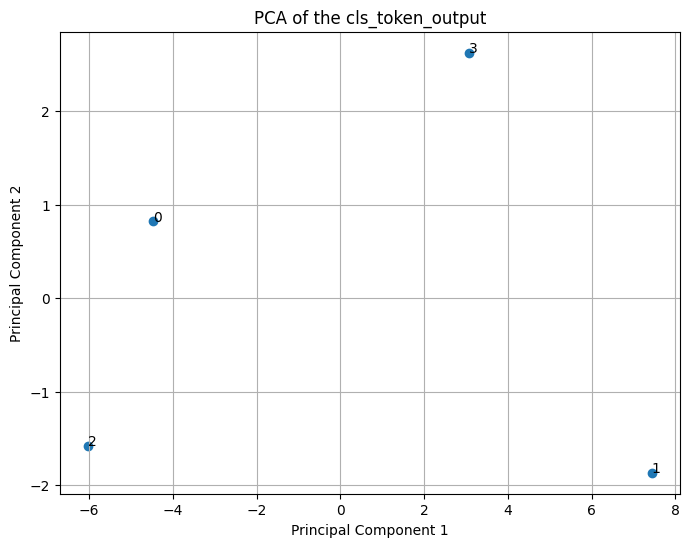

In [58]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca.loc[:, 0], X_pca.loc[:, 1])
for i in range(X_pca.shape[0]):
    cur_record = X_pca.iloc[i,:].copy()
    plt.annotate(cur_record.name, (cur_record[0], cur_record[1]))
    # plt.text(x, y, word, fontsize=12, color='red', ha='center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the cls_token_output')
plt.grid(True)
plt.show()

In [59]:
predictions

tensor([1, 0, 1, 0], device='cuda:0')

#### Layer weights

In [60]:
# Assuming model is your trained PyTorch model
state_dict = model.state_dict()

# Print all keys in the state_dict to see available weights
for name, param in state_dict.items():
    print(f"Layer: {name}, Size: {param.size()}")

Layer: embedding.weight, Size: torch.Size([28996, 64])
Layer: pos_encoding.pe, Size: torch.Size([1, 512, 64])
Layer: transformer_blocks.0.ln1.weight, Size: torch.Size([64])
Layer: transformer_blocks.0.ln1.bias, Size: torch.Size([64])
Layer: transformer_blocks.0.ln2.weight, Size: torch.Size([64])
Layer: transformer_blocks.0.ln2.bias, Size: torch.Size([64])
Layer: transformer_blocks.0.mha.key.weight, Size: torch.Size([64, 64])
Layer: transformer_blocks.0.mha.key.bias, Size: torch.Size([64])
Layer: transformer_blocks.0.mha.query.weight, Size: torch.Size([64, 64])
Layer: transformer_blocks.0.mha.query.bias, Size: torch.Size([64])
Layer: transformer_blocks.0.mha.value.weight, Size: torch.Size([64, 64])
Layer: transformer_blocks.0.mha.value.bias, Size: torch.Size([64])
Layer: transformer_blocks.0.mha.fc.weight, Size: torch.Size([64, 64])
Layer: transformer_blocks.0.mha.fc.bias, Size: torch.Size([64])
Layer: transformer_blocks.0.ann.0.weight, Size: torch.Size([256, 64])
Layer: transformer_blo

In [61]:
# Example: Accessing weights of a specific layer
layer_name = 'transformer_blocks.0.mha.query.weight'  # Change this to the name of your layer
layer_weights = state_dict[layer_name]

print(f"Weights of {layer_name}:")
print(layer_weights)
print(f'Dim: {layer_weights.shape}')

Weights of transformer_blocks.0.mha.query.weight:
tensor([[ 0.1727, -0.0824, -0.0985,  ...,  0.0608,  0.1989, -0.0043],
        [ 0.0537,  0.0111,  0.0834,  ...,  0.0040,  0.2146, -0.0895],
        [ 0.1386, -0.0690, -0.1269,  ...,  0.0748,  0.1128,  0.1041],
        ...,
        [-0.0253,  0.1754,  0.0199,  ...,  0.1551, -0.1510,  0.0891],
        [ 0.0124,  0.0227,  0.0191,  ...,  0.0715,  0.0765,  0.0767],
        [ 0.0800, -0.0373, -0.3048,  ...,  0.1486,  0.0421, -0.0047]],
       device='cuda:0')
Dim: torch.Size([64, 64])


#### Embeddings Layer

In [62]:
layer_name = 'embedding.weight'  # Change this to the name of your layer
layer_weights = state_dict[layer_name]

print(f"Weights of {layer_name}:")
print(layer_weights)
print(f'Dim: {layer_weights.shape}')

Weights of embedding.weight:
tensor([[-2.0269, -0.0397,  0.3224,  ..., -1.2944, -0.3757,  0.1242],
        [ 0.9355, -0.0528, -2.5014,  ..., -0.8677, -0.8753, -0.0183],
        [-1.4624,  0.1449,  0.5052,  ..., -0.0560,  2.8865,  1.0192],
        ...,
        [ 0.5956, -0.1124, -1.3018,  ..., -0.5911,  1.1179,  0.5068],
        [ 0.8362, -0.7397, -0.9278,  ...,  0.1818, -0.3442, -0.9591],
        [-1.3272,  0.6750,  0.4242,  ..., -0.6145,  1.1107,  2.3241]],
       device='cuda:0')
Dim: torch.Size([28996, 64])


In [63]:
len(tokenizer.vocab.keys())

28996

In [64]:
tokenizer.vocab

{'alphabet': 14502,
 '##writing': 17729,
 'Howell': 19929,
 'snorted': 16015,
 'Augsburg': 27398,
 'add': 5194,
 'They': 1220,
 'coal': 5289,
 'lined': 7265,
 'Rhineland': 23910,
 'substitution': 24393,
 'alliance': 7214,
 'massacre': 11584,
 'slightly': 2776,
 'rider': 10604,
 'Goose': 23914,
 'く': 900,
 '##ored': 13841,
 'ɪ': 362,
 'ナ': 955,
 'agreed': 2675,
 'Deportivo': 26569,
 'biology': 10256,
 'Mobile': 8410,
 '[unused77]': 77,
 'Tibetan': 12046,
 '##lded': 15414,
 'bye': 11901,
 'centers': 6425,
 'Romans': 10935,
 'grasped': 16375,
 '1957': 3034,
 'feud': 15081,
 'transitions': 26829,
 '##ymph': 25698,
 'Romani': 27876,
 'draw': 3282,
 'costume': 10220,
 'Santa': 3364,
 'symmetry': 16558,
 'common': 1887,
 'ʐ': 372,
 '##ía': 7171,
 'shifts': 12644,
 'elementary': 7876,
 '##cluded': 23498,
 '##э': 28415,
 'nominees': 21512,
 'Being': 6819,
 'recognised': 7398,
 'belly': 7413,
 '##p': 1643,
 'stations': 2930,
 'Israeli': 4878,
 'straw': 15235,
 '##por': 18876,
 'Nell': 24441,
 '#

#### Creatig word cloud

In [65]:
#### PCA of the word embeddings

embeddings_output = layer_weights.to('cpu').numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings_output)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca,index=tokenizer.vocab.keys())

In [66]:
#### Shortlist the words to plot PCA output

#### Create word cloud to find the words

# Combine all the tokens of train to create input to word cloud
train_ids = tokenized_datasets['train']['input_ids']
combined_text = ''
# for id in range(len(train_ids)):
for id in range(1000):
  cur_train_record = (','.join(tokenizer.convert_ids_to_tokens(train_ids[id])) + ',').replace('[', '').replace(']', '') # here we are converting the word index back to word for all the data in train
  combined_text += cur_train_record
combined_text

"CLS,hide,new,secret,##ions,from,the,parental,units,SEP,CLS,contains,no,wit,,,only,labor,##ed,gag,##s,SEP,CLS,that,loves,its,characters,and,communicate,##s,something,rather,beautiful,about,human,nature,SEP,CLS,remains,utterly,satisfied,to,remain,the,same,throughout,SEP,CLS,on,the,worst,revenge,-,of,-,the,-,ne,##rds,c,##lich,##és,the,filmmakers,could,d,##red,##ge,up,SEP,CLS,that,',s,far,too,tragic,to,merit,such,superficial,treatment,SEP,CLS,demonstrates,that,the,director,of,such,ho,##lly,##wood,block,##buster,##s,as,pat,##riot,games,can,still,turn,out,a,small,,,personal,film,with,an,emotional,wall,##op,.,SEP,CLS,of,sa,##uc,##y,SEP,CLS,a,depressed,fifteen,-,year,-,old,',s,su,##icidal,poetry,SEP,CLS,are,more,deeply,thought,through,than,in,most,`,right,-,thinking,',films,SEP,CLS,goes,to,absurd,lengths,SEP,CLS,for,those,movie,##go,##ers,who,complain,that,`,they,do,n,',t,make,movies,like,they,used,to,anymore,SEP,CLS,the,part,where,nothing,',s,happening,,,SEP,CLS,saw,how,bad,this,movie,was,SE

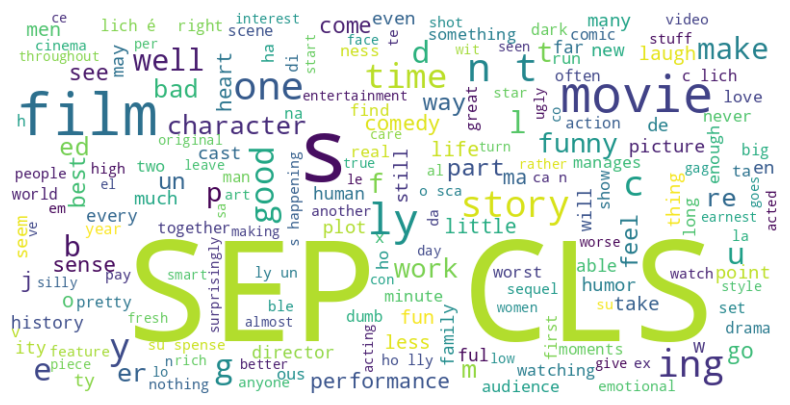

In [67]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=200).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes for a cleaner look
plt.show()

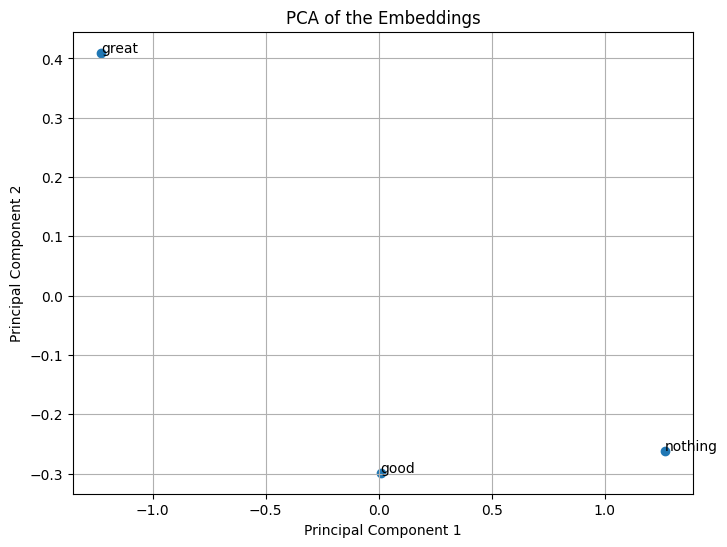

In [68]:
#### Plot the PCA for required words
# req_words = ['humor','comedy','funny']
req_words = ['nothing','great','good']
pca_req_words = X_pca.loc[req_words,:].copy()

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_req_words.loc[:, 0], pca_req_words.loc[:, 1])
for i in range(pca_req_words.shape[0]):
    cur_record = pca_req_words.iloc[i,:].copy()
    plt.annotate(cur_record.name, (cur_record[0], cur_record[1]))
    # plt.text(x, y, word, fontsize=12, color='red', ha='center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Embeddings')
plt.grid(True)
plt.show()

- Input: (2, 10) (batch size = 2, sequence length = 10)
- Embedding: (2, 10, 64)
- Positional Encoding: (2, 10, 64)
- After Transformer Block 1: (2, 10, 64)
- After Transformer Block 2: (2, 10, 64)
- CLS token extraction: (2, 64)
- Final classification logits: (2, 5)

# Model Parameters:

- vocab_size = 20,000 : The total number of unique tokens in the vocabulary.
- max_length = 1024 : The maximum sequence length that the model can handle.
- d_k = 16 : The dimension of each attention head (key/query/value vectors in multi-head attention).
- d_model = 64 : The dimension of the embeddings and hidden states in the model.
- n_heads = 4 : The number of attention heads in the multi-head attention mechanism.
- nlayers = 2 : The number of stacked Transformer blocks.
- n_classes = 5 : The number of classes in the classification task.
- dropout_prob = 0.1 : Dropout probability (regularization).

# Input Shape:

For the purpose of this explanation, let's assume a batch of size N = 2 with each input sequence containing T = 10 tokens (though the maximum sequence length is 1024, we'll use a smaller sequence for demonstration):

Here's the content of the image written in Markdown format:

```python
x = [
    [34, 567, 3456, 12, 3, 78, 456, 34, 786, 56],  # Example sequence 1
    [14, 89, 2345, 876, 34, 12, 45, 2345, 123, 45] # Example sequence 2
] # Shape: (N=2, T=10)
```

# Step-by-Step Explanation:

## 1. Embedding Layer (`self.embedding`):

- The input tokens are passed through an embedding layer that converts each token into a vector of size `d_model = 64`.

- Input `x` shape: `(N, T) = (2, 10)`.

- Output after embedding shape: `(N, T, d_model) = (2, 10, 64)`.

## 2. Positional Encoding (`self.pos_encoding`):

- Positional encoding is added to the embedded tokens to incorporate the order of tokens in the sequence.

- Positional encoding has the shape `(1, max_length, d_model) = (1, 1024, 64)`, but only the first 10 positions are used for the sequence length `T = 10`.

- After adding positional encodings, the shape remains the same: `(N, T, d_model) = (2, 10, 64)`.

## 3. Transformer Block - Layer 1 (`self.transformer_blocks`):

Each Transformer block consists of:

### Multi-Head Attention (`self.mha`):

- The input shape to the multi-head attention is `(N, T, d_model) = (2, 10, 64)`.
- The `query`, `key`, and `value` vectors are created by applying linear transformations, yielding `(N, T, d_k * n_heads) = (2, 10, 64)`.
- These are reshaped into `(N, n_heads, T, d_k) = (2, 4, 10, 16)` for multi-head attention.
- Attention is computed, resulting in a tensor of shape `(N, n_heads, T, d_k) = (2, 4, 10, 16)`, which is concatenated back into `(N, T, d_model) = (2, 10, 64)`.
- After applying the final linear layer, the shape remains `(N, T, d_model) = (2, 10, 64)`.

### Add & Layer Norm:

- The output of the attention mechanism is added to the input (residual connection), and layer normalization is applied. The shape is still `(N, T, d_model) = (2, 10, 64)`.

### Feed-Forward Network (`self.ann`):

- The feed-forward network consists of two linear layers, where the first layer expands the dimensionality to `4 * d_model = 256` and the second layer reduces it back to `d_model = 64`.
- After the feed-forward pass, the shape remains `(N, T, d_model) = (2, 10, 64)`.

### Add & Layer Norm:

- The output of the feed-forward network is added back to the input (residual connection), and layer normalization is applied. The shape remains `(N, T, d_model) = (2, 10, 64)`.

## 4. Transformer Block - Layer 2:

- The same process is repeated as in Layer 1.
- Input shape: `(N, T, d_model) = (2, 10, 64)`.
- Output shape: `(N, T, d_model) = (2, 10, 64)`.

## 5. Extracting the [CLS] Token:

- After passing through the transformer blocks, we extract the output corresponding to the first token in each sequence (usually the [CLS] token in Transformer models).
- This token is assumed to summarize the entire sequence for classification purposes.
- Shape of the [CLS] token output: `(N, d_model) = (2, 64)`.

## 6. Layer Normalization (`self.ln`):

- Layer normalization is applied to the extracted [CLS] token output.
- Shape remains: `(N, d_model) = (2, 64)`.

## 7. Fully Connected Layer (`self.fc`):

- The final linear layer projects the normalized [CLS] token output into the number of classes `n_classes = 5`.
- Output shape (logits for classification): `(N, n_classes) = (2, 5)`.

## Final Output:

- The model outputs two values:

  1. CLS token representation: Shape `(2, 64)`, a learned representation summarizing each input sequence.
  
  2. Logits for classification: Shape `(2, 5)`, representing class scores for the classification task.

  ## Summary of Output Shapes at Each Step:

- Input: (2, 10) (batch size = 2, sequence length = 10)
- Embedding: (2, 10, 64)
- Positional Encoding: (2, 10, 64)
- After Transformer Block 1: (2, 10, 64)
- After Transformer Block 2: (2, 10, 64)
- CLS token extraction: (2, 64)
- Final classification logits: (2, 5)

# Trasnsformer Encoder

Recall the steps in a Transformer Encoder:

1. Tokenize (append special tokens — [CLS])
2. Get Encoded sequence added with position
3. Multi-headed attention
     Converts encoded sequence to context aware representation (still a sequence)
4. Residual and layer normalization
5. Dense Layers for further representation learning
6. Encoder block outputs a encoded representation
7. Use the representation of [CLS] token to perform text understanding tasks.

<p align="center">
  <img src="https://www.dropbox.com/scl/fi/yy3z314nfis7ief9rvl8q/pic8.png?rlkey=0j8bu78fb5f8cz3zsc7xu91h3&raw=1" alt="Centered Image">
</p>

## BERT Model

BERT (Bidirectional Encoder Representations from Transformers) is a language model developed by Google. It uses transformer architecture to process text bidirectionally, understanding context from both left and right. BERT is pre-trained on large text corpora and can be fine-tuned for various NLP tasks like question answering, sentiment analysis, and text classification. The datset is prepared by randomly masking $15\%$ of the tokens. Among the masked ones, $80\%$ are made blanked, $10\%$ wrong token is put and another $10\%$ right token is used. This training is called as mass language modelling pre training task. If it is done on an encoder only architecture, the trained model is called the BERT based model. The prediciton happens using softmax activation which gives a probabilit distribution over the entire vocabulary.

- During training, the LM head (language model head) with will sit on the blank token. The blank layer is fed through a dense layer and then through a softmax activation function.
- The text classification happens after the mass language modelling is done and the base model is being trained.

1. Pre-training (Masked Language Modeling):
   - Scrape internet data, randomly mask 15% of tokens in each document.
   - Pass all tokens through the model, but only compute loss for masked positions.
   - Use a language model head on the output side to predict masked tokens.
   - Backpropagate errors to train the entire model.

2. Fine-tuning for specific tasks:
   - Use the pre-trained BERT model as a base.
   - Add a classification head on top of the CLS token's representation for task-specific outputs.

3. Two types of "heads" in BERT:
   - Multi-head attention: Part of the core transformer architecture, on the input side.
   - Task-specific head (e.g., language model head or classification head): Added on the output side for specific tasks.

# Transformer Decoder Architecture

Compared to transformer encoder, there are two significant changes:

- Instead of multi-head attention, masked multi-head attention mechanism is used. $$e_k = \sum_{i = 1}^{\text{max token}} (q_i \cdot k_i) v_i$$
- Instead of CLS token, last token is used to predict the next token. $$e_k = \sum_{i = 1}^{k - 1} (q_i \cdot k_i) v_i$$

<p align="center">
  <img src="https://www.dropbox.com/scl/fi/1i68d1r4cpxd5f5uooiq2/9.png?rlkey=559luvhscggba9bzg3qgbflgq&raw=1" alt="Centered Image">
</p>

## Steps of a transformer decoder architecture

1. Tokenize the prompt
2. Get Encoded sequence added with position
3. Masked Multi-headed attention
   - Masking makes the attention attend only to tokens to the left
4. Residual and layer normalization
5. Dense Layers for further representation learning
6. Decoder block outputs sequence of representations
7. Use the representation of last token to generate the next token. Top-P and Top-K are text generation sampling methods:
   - Top-K: Selects the K most likely next tokens, then samples from this reduced set. Output the max is $K = 1$.
   - Top-P (nucleus sampling): Chooses the smallest set of tokens whose cumulative probability exceeds P, then samples from this dynamic set.
   - Both methods aim to balance diversity and quality in generated text by limiting the selection pool, but Top-P adapts better to varying probability distributions.
   - After an input is generated, it is appended in the input list and the next input is generated based on the appended input list. This is called as an **auto regressive model**.
8. Repeat by including the generated token as part of the prompt

## GPT

1. GPT training (autoregressive language modeling):
   - Predicts the next token given all previous tokens in the sequence.
   - Can use multi-step prediction: Predict multiple tokens ahead, accumulate losses, then backpropagate.
   - Training can involve predicting 1, 2, 3, or N steps ahead, collecting losses for all steps.

2. Key differences from BERT:
   - Directionality: GPT is unidirectional (left-to-right), while BERT is bidirectional.
   - Task: GPT focuses on next-token prediction; BERT on masked token prediction.
   - Attention mechanism: GPT uses causal (masked) self-attention; BERT uses full self-attention.
   - Pre-training objective: GPT uses autoregressive language modeling; BERT uses masked language modeling and next sentence prediction.

3. Emergent properties:
   - LLMs exhibited abilities they weren't explicitly trained for, such as explaining jokes.
   - Given a single example in the prompt (e.g., "joke: explanation"), models could generalize to explain new jokes.

4. Introduction of instruction tuning:
   - Developers created a new fine-tuning dataset called the instruction tuning dataset.
   - This dataset consists of pairs of instructions and their correct responses.
   - Purpose of instruction tuning:
      - To guide the pre-trained model in producing desired outputs based on given instructions.
      - To bridge the gap between the model's ability to predict words and its ability to follow specific directives.

### How instruction tuning dataset is prepared? A case study of GPT 2

<p align="center">
  <img src="https://jalammar.github.io/images/gpt2/wikipedia-summarization.png" alt="Wikipedia Summarization Diagram">
</p>


1. Dataset creation for summarization:
   - Use Wikipedia articles, assuming the first paragraph is a summary of the entire article.
   - Prepare pairs: (full article text, "summarize" + first paragraph).

2. Instruction-tuning process:
   - Start with a pre-trained model that can predict next tokens.
   - Use the prepared dataset to fine-tune the model on the summarization task.

3. Training procedure:
   - Input: Full article text + "summarize" instruction.
   - Target: The summary (first paragraph of the article).
   - The model learns to generate the summary when prompted with "summarize".

4. Loss calculation and backpropagation:
   - Generate the entire summary token by token.
   - Collect losses for all generated tokens.
   - Backpropagate the accumulated loss to update the model's parameters.

5. Similar fine tuning can be done for translation, question-answering and analysis tasks (like sentiment analysis).

<p align="center">
  <img src="https://jalammar.github.io/images/gpt2/decoder-only-summarization.png" alt="GPT-2 Summarization Diagram">
</p>

One of the issues is output is verbose. So how do we align that output to what humans like to consume?

### How LLMs are evaluated?

LLMs are typically evaluated using comprehensive benchmark datasets like BIG-bench, which contain diverse language tasks. After development, models are tested on these benchmarks to assess their capabilities across various linguistic challenges. It's crucial to maintain strict separation between training and testing data to ensure fair evaluation. Recent controversies have highlighted the importance of this separation, as using benchmark data for training can lead to artificially inflated performance metrics.

### Foundational Models

Foundational models are large-scale AI systems trained on vast, diverse datasets. They serve as versatile bases for multiple downstream tasks and applications. Key characteristics include broad knowledge, adaptability through prompt engineering and fine-tuning, and the ability to generalize to new tasks with minimal additional training. Examples include GPT, BERT, and T5.

Regarding multimodal LLMs:

Multimodal Large Language Models (LLMs) extend the capabilities of traditional text-based LLMs by incorporating multiple types of data, such as images, audio, and video. These models can process and generate content across different modalities, enabling more complex and diverse applications. Key features of multimodal LLMs include:

1. Cross-modal understanding: They can interpret relationships between different types of data (e.g., describing images in text or generating images from text descriptions).

2. Enhanced context comprehension: By leveraging multiple data types, these models can better understand and respond to complex queries or tasks.

3. Versatile applications: They can be used for tasks like visual question answering, image captioning, text-to-image generation, and more.

4. Improved accessibility: Multimodal LLMs can bridge gaps between different forms of communication, potentially aiding users with diverse needs or preferences.

5. Challenges in training and evaluation: Developing and assessing these models requires careful consideration of how different modalities interact and contribute to overall performance.

Examples of multimodal LLMs include GPT-4 (with image understanding capabilities), DALL-E (text-to-image generation), and PaLM-E (language and robotic task planning).